### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Calculando o faturamento total de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

# Faturamento total (todas as lojas)
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nFaturamento Total (Todas as Lojas): R$ {faturamento_total:,.2f}")

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58

Faturamento Total (Todas as Lojas): R$ 5,871,490.79


# 2. Vendas por Categoria


In [4]:
# Agrupando e contando as vendas por categoria para cada loja
vendas_categoria_loja1 = loja.groupby('Categoria do Produto').size().sort_values(ascending=False)
vendas_categoria_loja2 = loja2.groupby('Categoria do Produto').size().sort_values(ascending=False)
vendas_categoria_loja3 = loja3.groupby('Categoria do Produto').size().sort_values(ascending=False)
vendas_categoria_loja4 = loja4.groupby('Categoria do Produto').size().sort_values(ascending=False)

# Exibindo os resultados
print("📊 Vendas por Categoria - Loja 1:\n", vendas_categoria_loja1)
print("\n📊 Vendas por Categoria - Loja 2:\n", vendas_categoria_loja2)
print("\n📊 Vendas por Categoria - Loja 3:\n", vendas_categoria_loja3)
print("\n📊 Vendas por Categoria - Loja 4:\n", vendas_categoria_loja4)

📊 Vendas por Categoria - Loja 1:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
dtype: int64

📊 Vendas por Categoria - Loja 2:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
dtype: int64

📊 Vendas por Categoria - Loja 3:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
dtype: int64

📊 Vendas por Categoria - Loja 4:
 Categoria do Produto
moveis                   480
eletronicos  

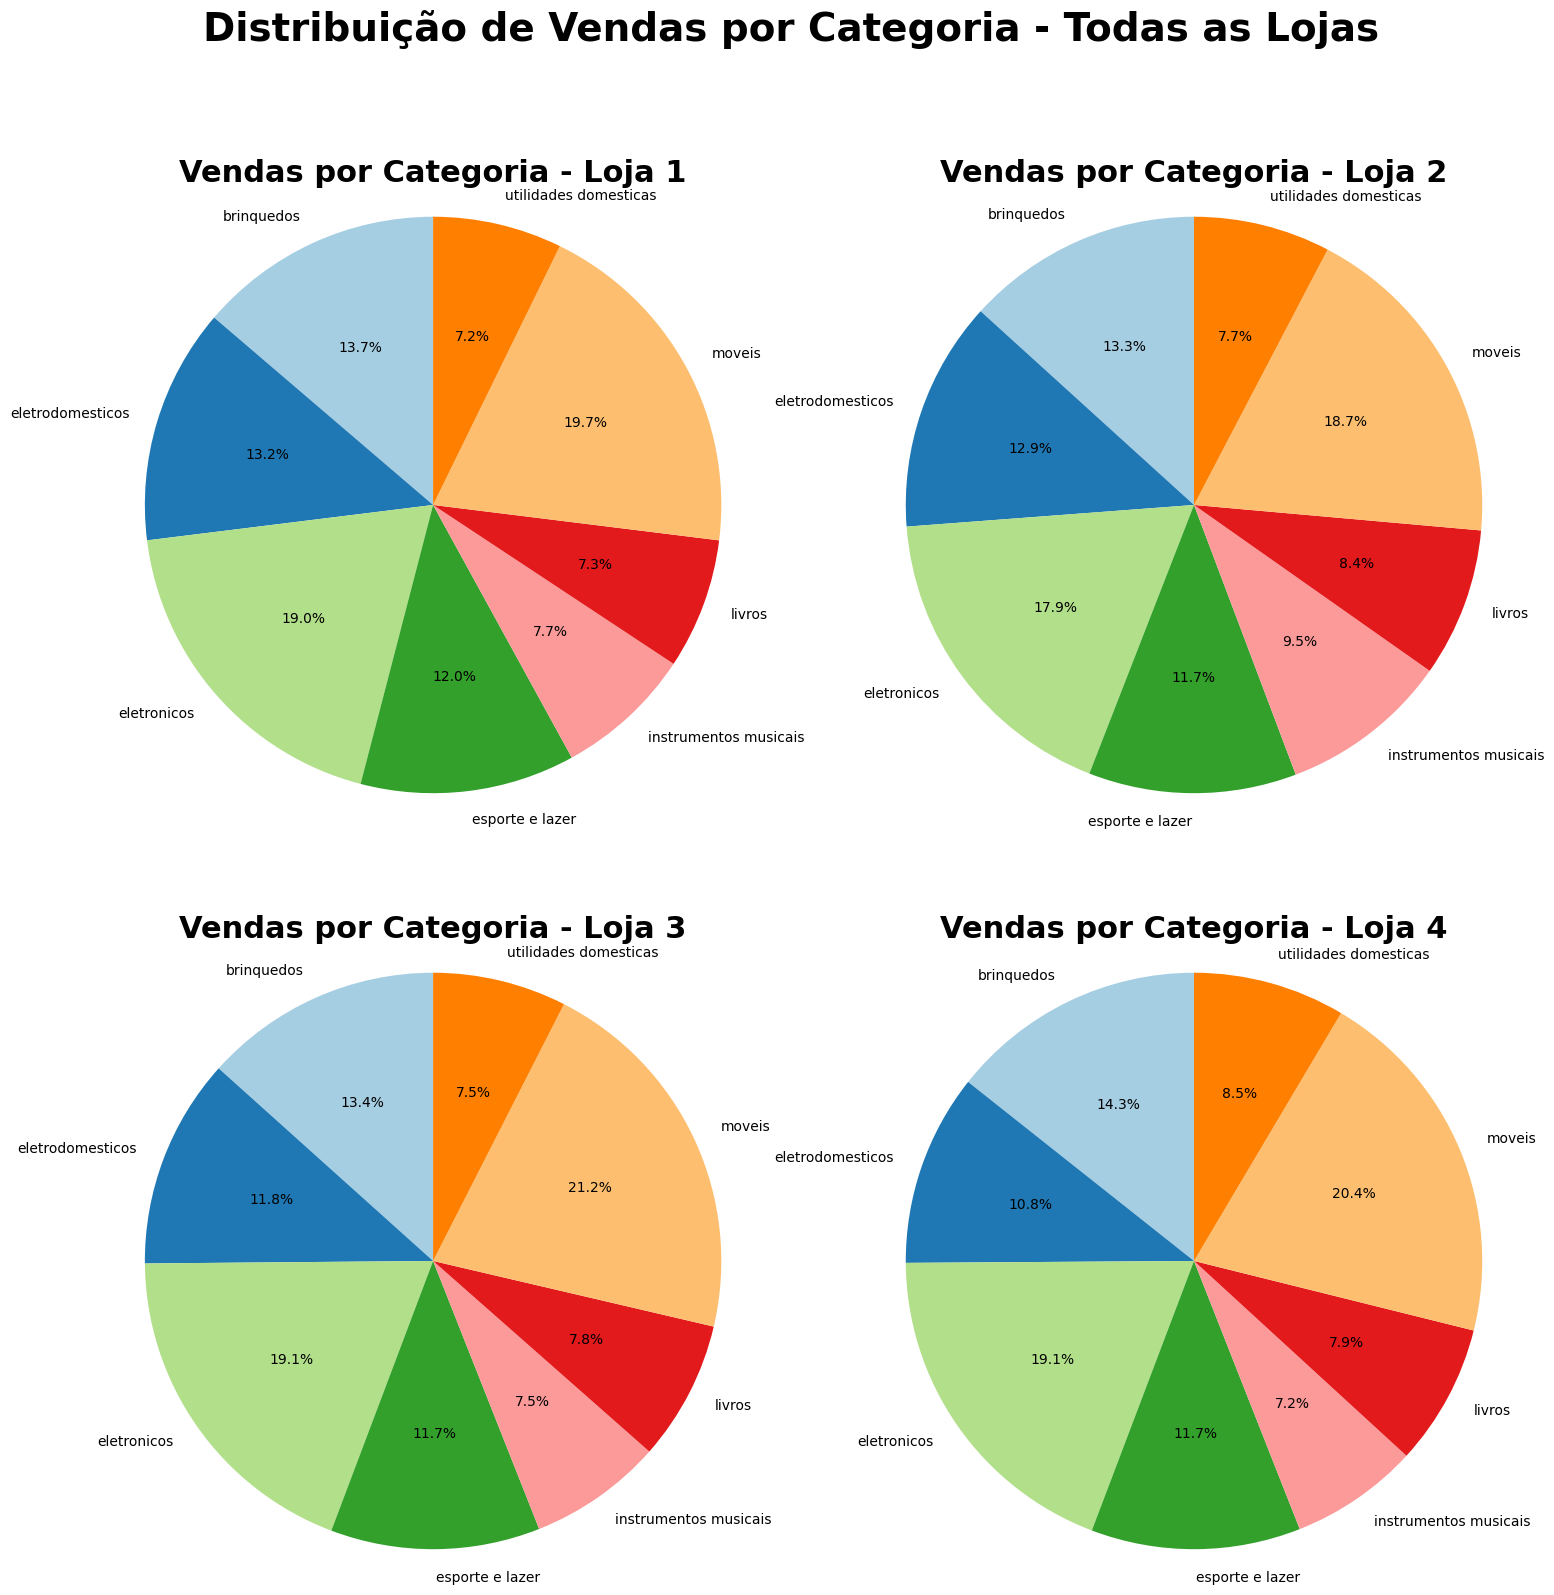

In [5]:
import matplotlib.pyplot as plt

# Configurando o layout 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
fig.suptitle("Distribuição de Vendas por Categoria - Todas as Lojas", fontsize=28, fontweight='bold')

# Lista de dataframes e títulos
lojas = [loja, loja2, loja3, loja4]
titulos = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = plt.cm.Paired.colors  # Paleta de cores consistente

# Gerando os gráficos
for i, ax in enumerate(axs.flat):
    vendas_categoria = lojas[i].groupby("Categoria do Produto").size()
    ax.pie(vendas_categoria,
           labels=vendas_categoria.index,
           autopct='%1.1f%%',
           startangle=90,
           colors=cores)
    ax.set_title(f"Vendas por Categoria - {titulos[i]}", fontsize=22, fontweight='bold')
    ax.axis('equal')  # Garantindo que o gráfico seja circular

plt.show()

# 3. Média de Avaliação das Lojas

In [6]:
# Calculando a média das avaliações para cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


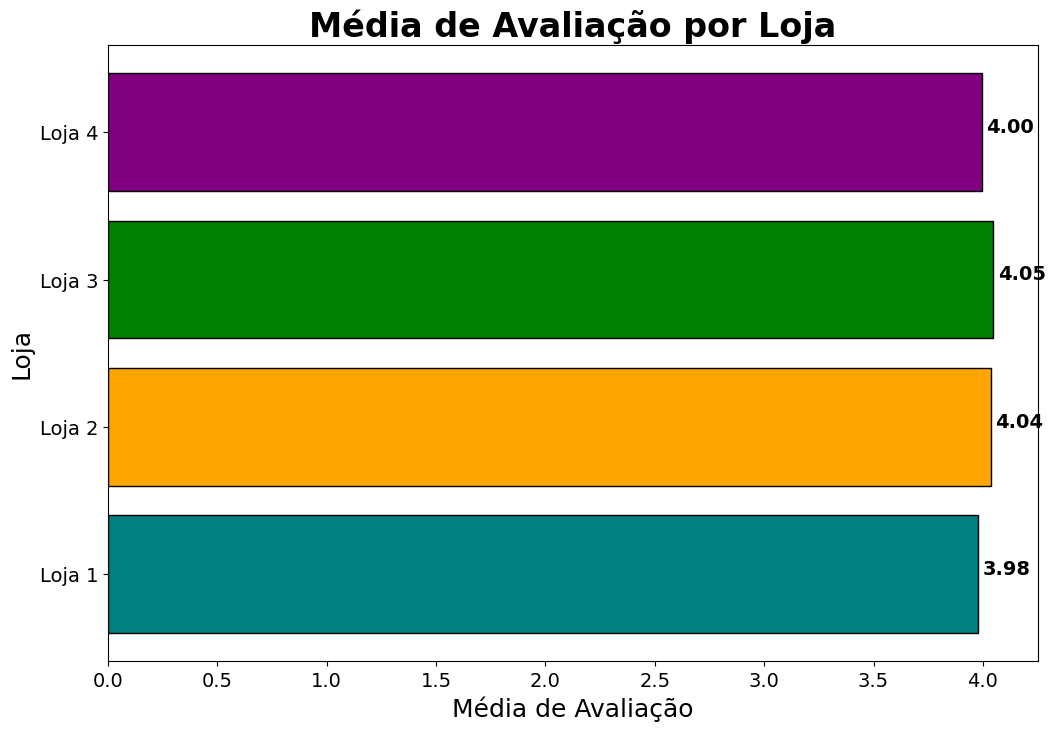

In [7]:
import matplotlib.pyplot as plt

# Dados de exemplo para médias (substitua pelos valores reais)
medias_avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['teal', 'orange', 'green', 'purple']

# Criando o gráfico
plt.figure(figsize=(12, 8))
bars = plt.barh(nomes_lojas, medias_avaliacoes, color=cores, edgecolor='black')
plt.title("Média de Avaliação por Loja", fontsize=24, fontweight='bold')
plt.xlabel("Média de Avaliação", fontsize=18)
plt.ylabel("Loja", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adicionando os rótulos dos valores nas barras
for bar in bars:
    plt.text(bar.get_width() + 0.02,  # Ajuste horizontal para o rótulo não ficar muito próximo
             bar.get_y() + bar.get_height() / 2,  # Centraliza o texto verticalmente
             f"{bar.get_width():.2f}",  # Formato do texto (2 casas decimais)
             ha='left',
             fontsize=14,
             fontweight='bold',
             color='black')
plt.show()

# 4. Produtos Mais e Menos Vendidos


🏆 Loja 1 - Top 5 Mais Vendidos
Produto
TV Led UHD 4K         60
Micro-ondas           60
Guarda roupas         60
Secadora de roupas    58
Blocos de montar      56
dtype: int64

⚠️ Loja 1 - Top 5 Menos Vendidos
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Celular ABXY                   33
Headset                        33
dtype: int64

🏆 Loja 2 - Top 5 Mais Vendidos
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
dtype: int64

⚠️ Loja 2 - Top 5 Menos Vendidos
Produto
Fone de ouvido       37
Poltrona             35
Impressora           34
Mesa de jantar       34
Jogo de tabuleiro    32
dtype: int64

🏆 Loja 3 - Top 5 Mais Vendidos
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Cômoda             55
Jogo de panelas    55
dtype: int64

⚠️ Loja 3 - Top 5 Menos Vendidos
Produto
Copo térm

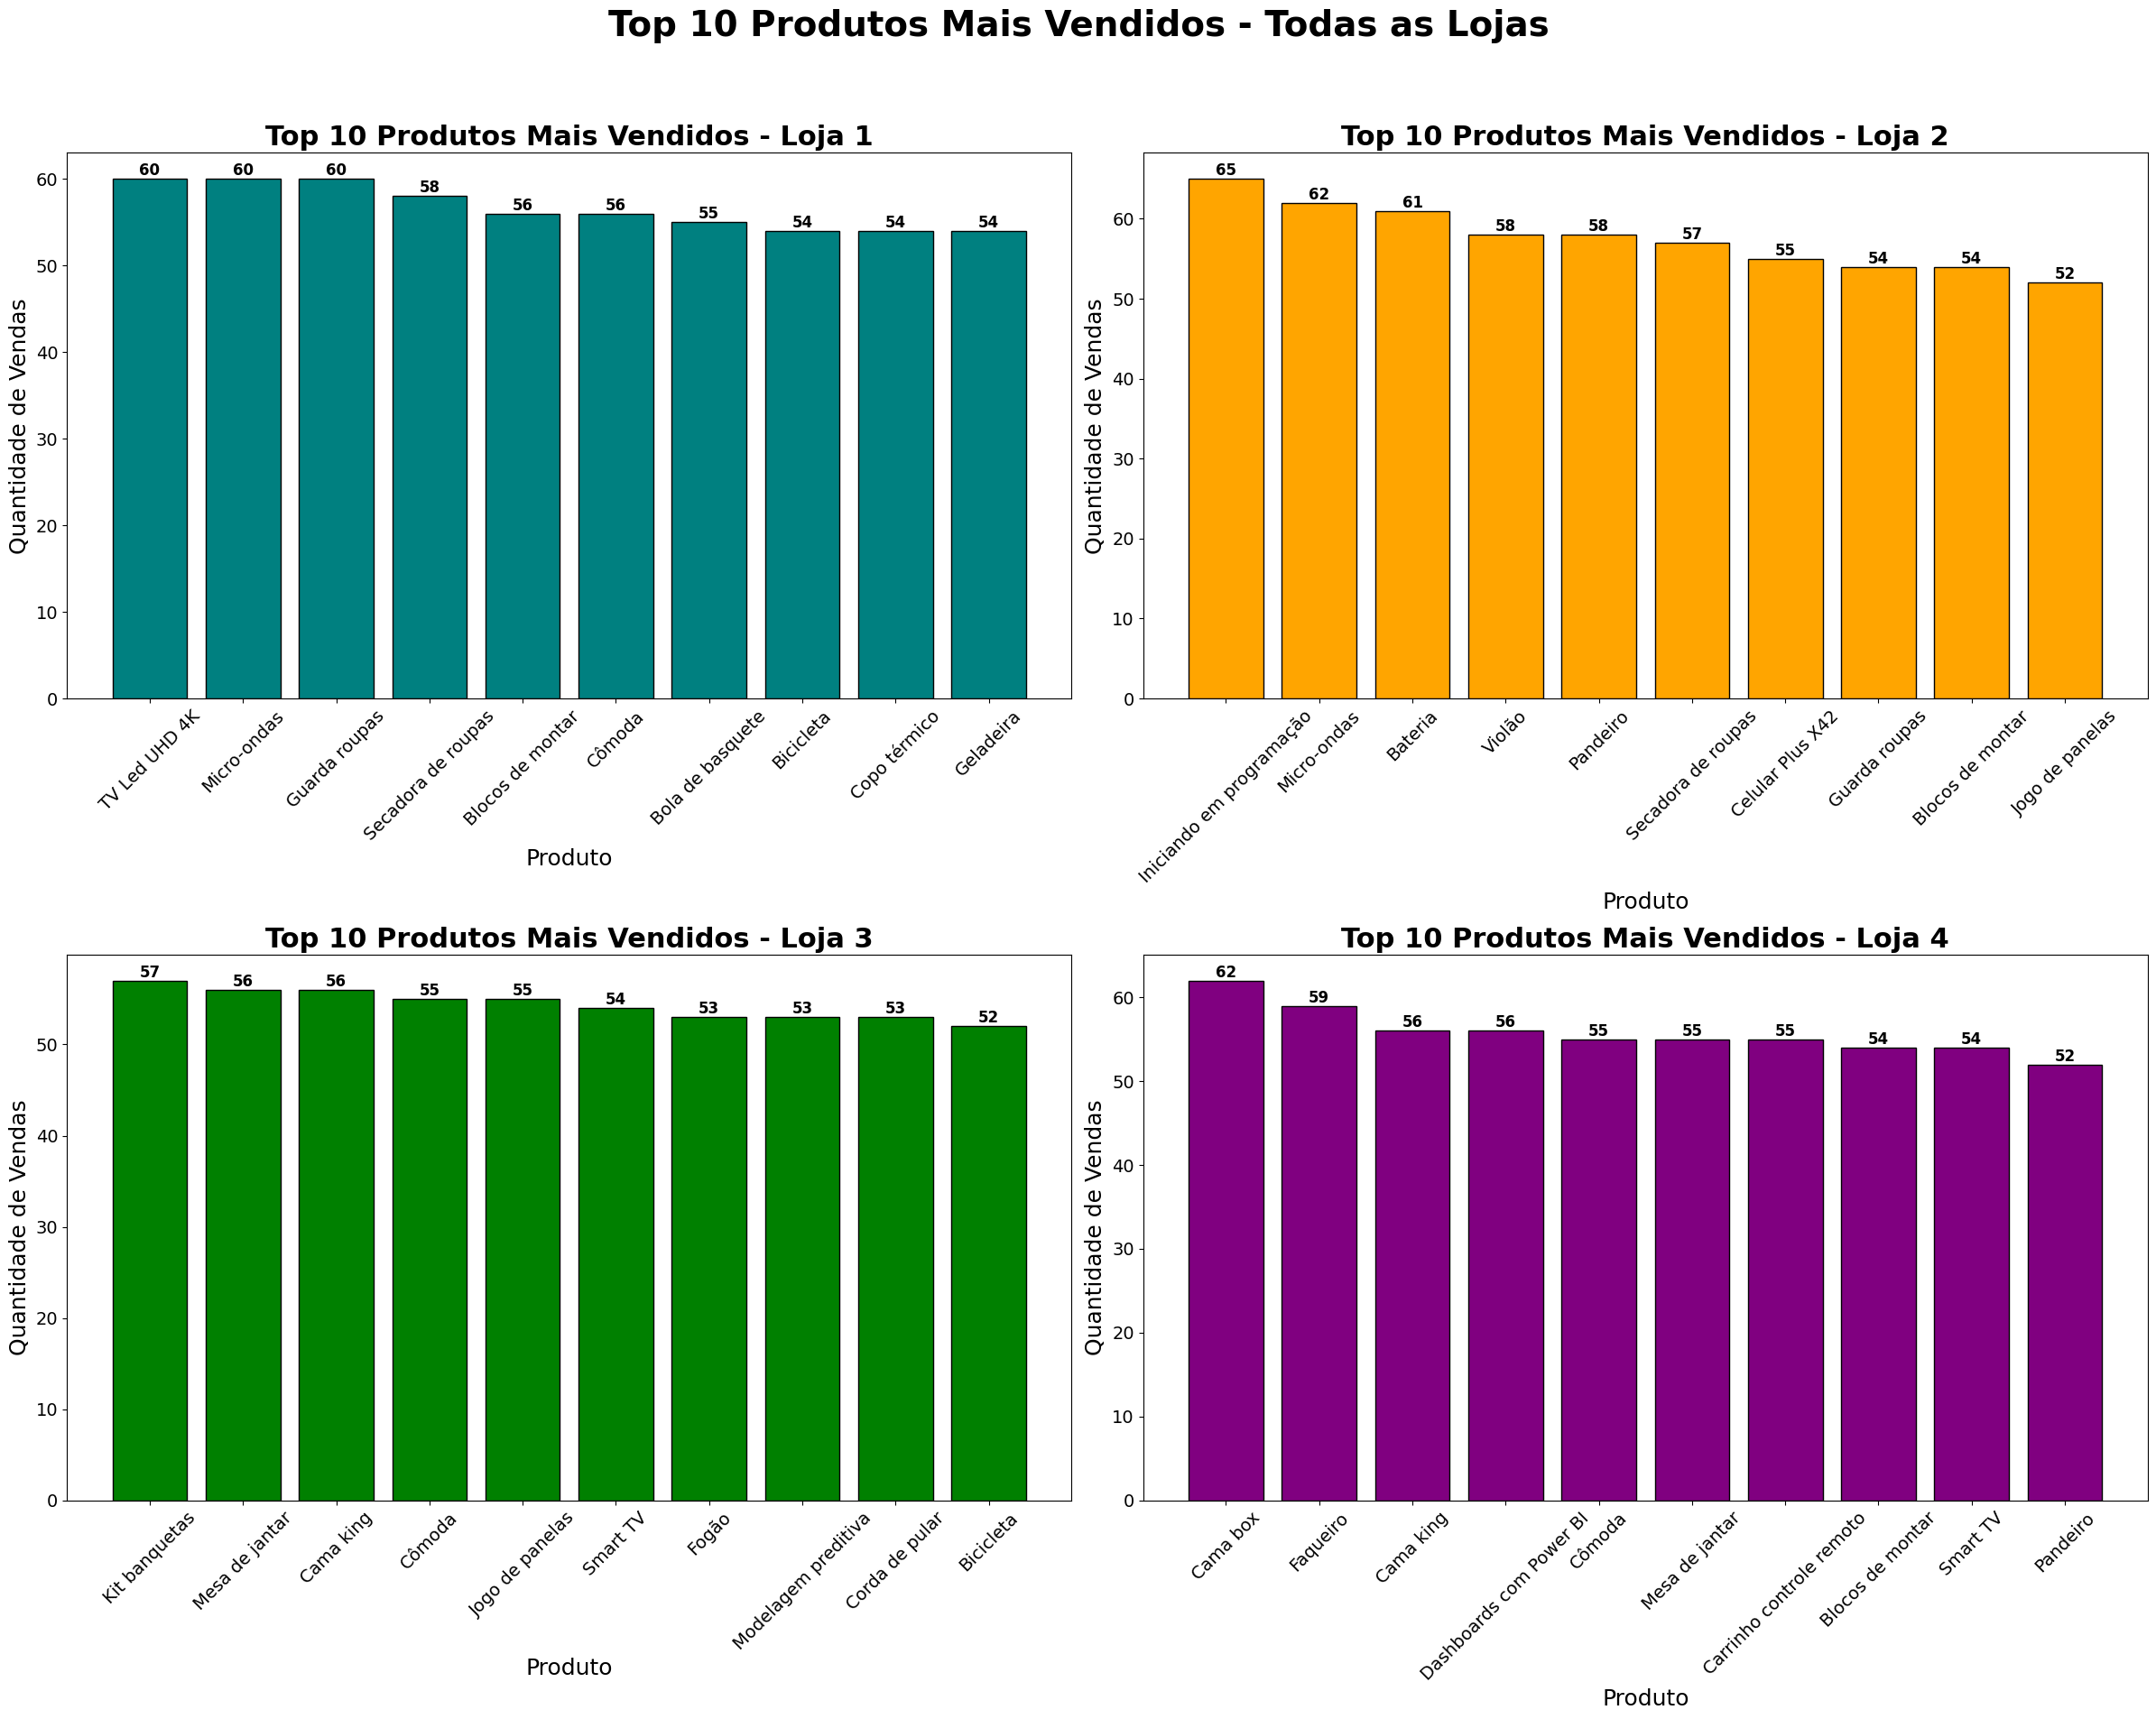

In [8]:
import matplotlib.pyplot as plt

# Identificando os produtos mais e menos vendidos
def produtos_mais_menos_vendidos(loja_df, titulo, cor, ax):
    # Contagem de vendas por produto
    vendas_por_produto = loja_df.groupby("Produto").size().sort_values(ascending=False)

    # Exibindo os 5 mais e menos vendidos
    print(f"\n🏆 {titulo} - Top 5 Mais Vendidos")
    print(vendas_por_produto.head(5))
    print(f"\n⚠️ {titulo} - Top 5 Menos Vendidos")
    print(vendas_por_produto.tail(5))

    # Visualizando com gráfico de barras
    vendas_top10 = vendas_por_produto.head(10)
    bars = ax.bar(vendas_top10.index, vendas_top10.values, color=cor, edgecolor='black')
    ax.set_title(f"Top 10 Produtos Mais Vendidos - {titulo}", fontsize=22, fontweight='bold')
    ax.set_xlabel("Produto", fontsize=18)
    ax.set_ylabel("Quantidade de Vendas", fontsize=18)
    ax.tick_params(axis='x', rotation=45, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Adicionando os rótulos dos valores nas barras
    ax.bar_label(bars, label_type='edge', fontsize=12, fontweight='bold', color='black')

# Criando a figura com 4 quadrantes
fig, axs = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle("Top 10 Produtos Mais Vendidos - Todas as Lojas", fontsize=28, fontweight='bold')

# Aplicando para cada loja com cores diferentes
produtos_mais_menos_vendidos(loja, "Loja 1", cor='teal', ax=axs[0, 0])
produtos_mais_menos_vendidos(loja2, "Loja 2", cor='orange', ax=axs[0, 1])
produtos_mais_menos_vendidos(loja3, "Loja 3", cor='green', ax=axs[1, 0])
produtos_mais_menos_vendidos(loja4, "Loja 4", cor='purple', ax=axs[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Frete Médio por Loja


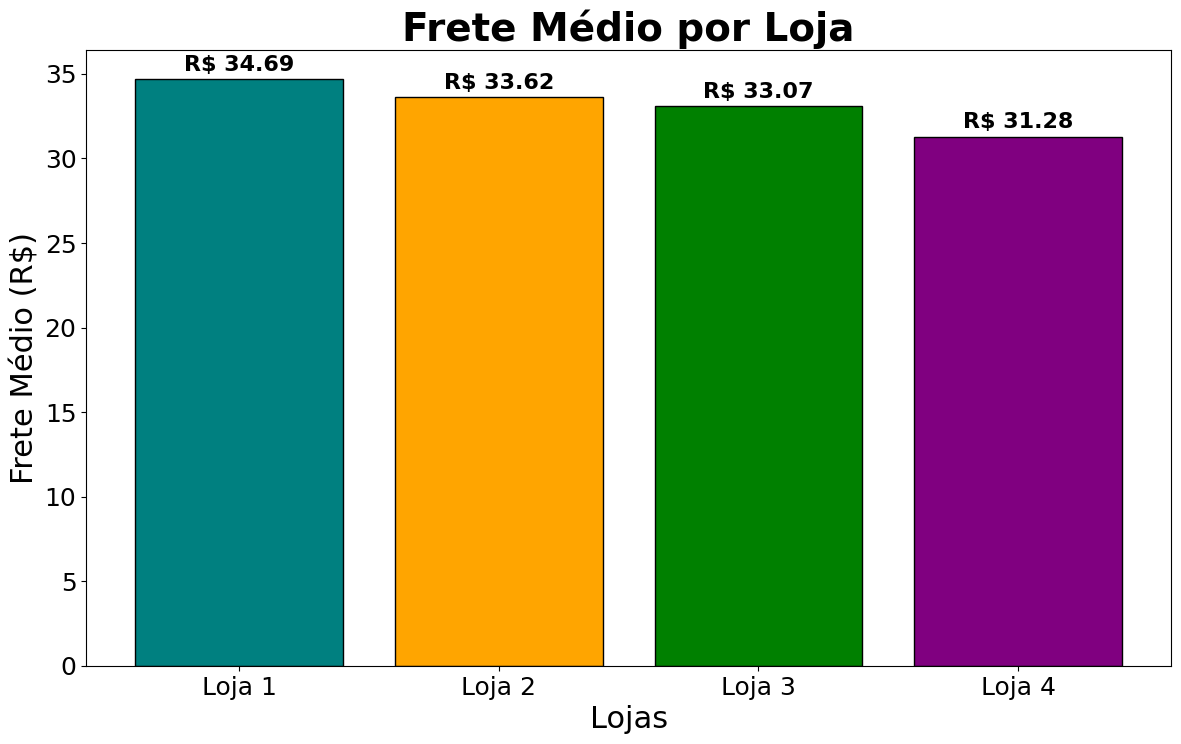

In [10]:
import matplotlib.pyplot as plt

# Calculando o frete médio para cada loja
fretes_medios = [
    loja['Frete'].mean(),
    loja2['Frete'].mean(),
    loja3['Frete'].mean(),
    loja4['Frete'].mean()
]

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ['teal', 'orange', 'green', 'purple']

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(lojas, fretes_medios, color=cores, edgecolor='black')
plt.title("Frete Médio por Loja", fontsize=28, fontweight='bold')
plt.xlabel("Lojas", fontsize=22)
plt.ylabel("Frete Médio (R$)", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adicionando os valores em cada barra
for bar, frete in zip(bars, fretes_medios):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.5,
             f"R$ {frete:.2f}",
             ha='center', fontsize=16, fontweight='bold', color='black')

plt.show()

**ANÁLISE COMPLEMENTAR**

In [21]:
# Normalizando as métricas de cada loja

# Calculando os valores totais e médios de cada loja
faturamentos = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]
avaliacoes = [loja['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(),
              loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]
fretes = [loja['Frete'].mean(), loja2['Frete'].mean(), loja3['Frete'].mean(), loja4['Frete'].mean()]

# Função para normalizar (quanto maior, melhor)
def normaliza_maior_melhor(lista):
    minimo = min(lista)
    maximo = max(lista)
    return [(x - minimo) / (maximo - minimo) if (maximo - minimo) != 0 else 0 for x in lista]

# Função para normalizar (quanto menor, melhor)
def normaliza_menor_melhor(lista):
    minimo = min(lista)
    maximo = max(lista)
    return [(maximo - x) / (maximo - minimo) if (maximo - minimo) != 0 else 0 for x in lista]

# Aplicando a normalização
faturamento_normalizado = normaliza_maior_melhor(faturamentos)
avaliacao_normalizada = normaliza_maior_melhor(avaliacoes)
frete_normalizado = normaliza_menor_melhor(fretes)  # custo, quanto menor melhor

# Calculando a eficiência média
eficiencia_media = [
    (faturamento_normalizado[i] + avaliacao_normalizada[i] + frete_normalizado[i]) / 3
    for i in range(4)
]

# Mostrando os resultados
for i, eficiencia in enumerate(eficiencia_media, 1):
    print(f'Eficiência da Loja {i}: {eficiencia:.2f}')
#################

# Criando um DataFrame com as lojas e suas eficiências
dados_lojas = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Eficiência": eficiencia_media
})

# Ordenando as lojas pela eficiência (do menor para o maior)
dados_lojas = dados_lojas.sort_values(by="Eficiência", ascending=True)

# Exibindo o DataFrame ordenado
print("\n🛑 Eficiência das Lojas (Da menos para a mais eficiente):")
print(dados_lojas)

# Identificando a loja menos eficiente
menos_eficiente = dados_lojas.iloc[0]

print("\n🚩 Loja Menos Eficiente:")
print(menos_eficiente)

Eficiência da Loja 1: 0.33
Eficiência da Loja 2: 0.62
Eficiência da Loja 3: 0.67
Eficiência da Loja 4: 0.42

🛑 Eficiência das Lojas (Da menos para a mais eficiente):
     Loja  Eficiência
0  Loja 1    0.333333
3  Loja 4    0.422082
1  Loja 2    0.617554
2  Loja 3    0.668015

🚩 Loja Menos Eficiente:
Loja            Loja 1
Eficiência    0.333333
Name: 0, dtype: object


In [30]:
nome_loja = menos_eficiente["Loja"]
eficiencia = menos_eficiente["Eficiência"]

In [31]:
# Relatório Final
print("📊 RELATÓRIO DE ANÁLISE DE VENDAS DAS LOJAS")
print("\n🔎 INTRODUÇÃO")
print("Neste relatório, apresento uma análise detalhada do desempenho das quatro lojas, com foco em métricas como faturamento total, satisfação dos clientes, vendas por categoria, produtos mais e menos vendidos e custos de frete. O objetivo é identificar a loja com o melhor desempenho geral para ser recomendada ao Senhor João para venda.\n")

print("💰 1. ANÁLISE DE FATURAMENTO TOTAL")
print(f"Loja 1: R$ {faturamentos[0]:,.2f}")
print(f"Loja 2: R$ {faturamentos[1]:,.2f}")
print(f"Loja 3: R$ {faturamentos[2]:,.2f}")
print(f"Loja 4: R$ {faturamentos[3]:,.2f}\n")

print("⭐ 2. MÉDIA DE AVALIAÇÃO DOS CLIENTES")
print(f"Loja 1: {avaliacoes[0]:.2f}")
print(f"Loja 2: {avaliacoes[1]:.2f}")
print(f"Loja 3: {avaliacoes[2]:.2f}")
print(f"Loja 4: {avaliacoes[3]:.2f}\n")

print("🚚 3. ANÁLISE DOS CUSTOS DE FRETE")
print(f"Loja 1: R$ {fretes[0]:,.2f}")
print(f"Loja 2: R$ {fretes[1]:,.2f}")
print(f"Loja 3: R$ {fretes[2]:,.2f}")
print(f"Loja 4: R$ {fretes[3]:,.2f}\n")

print("⚙️ 4. ANÁLISE DAS EFICIÊNCIAS USANDO NORMALIZAÇÃO")
print(f"Loja 1: {eficiencia_media[0]:.4f}")
print(f"Loja 2: {eficiencia_media[1]:.4f}")
print(f"Loja 3: {eficiencia_media[2]:.4f}")
print(f"Loja 4: {eficiencia_media[3]:.4f}\n")

# Encontrando a loja com menor eficiência
indice_menos_eficiente = eficiencia_media.index(min(eficiencia_media))
nome_loja = f"Loja {indice_menos_eficiente + 1}"
eficiencia = min(eficiencia_media)

print("📊 5. CONCLUSÃO E RECOMENDAÇÃO")
print(f"Com base nas análises acima, a loja recomendada para venda é a {nome_loja}, "
      f"que apresenta a eficiência de {eficiencia:.4f}, a menor entre as lojas, "
      "considerando um balanço entre faturamento, avaliação dos clientes e custos de frete.\n")

📊 RELATÓRIO DE ANÁLISE DE VENDAS DAS LOJAS

🔎 INTRODUÇÃO
Neste relatório, apresento uma análise detalhada do desempenho das quatro lojas, com foco em métricas como faturamento total, satisfação dos clientes, vendas por categoria, produtos mais e menos vendidos e custos de frete. O objetivo é identificar a loja com o melhor desempenho geral para ser recomendada ao Senhor João para venda.

💰 1. ANÁLISE DE FATURAMENTO TOTAL
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58

⭐ 2. MÉDIA DE AVALIAÇÃO DOS CLIENTES
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00

🚚 3. ANÁLISE DOS CUSTOS DE FRETE
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28

⚙️ 4. ANÁLISE DAS EFICIÊNCIAS USANDO NORMALIZAÇÃO
Loja 1: 0.3333
Loja 2: 0.6176
Loja 3: 0.6680
Loja 4: 0.4221

📊 5. CONCLUSÃO E RECOMENDAÇÃO
Com base nas análises acima, a loja recomendada para venda é a Loja 1, que apresenta a eficiência de 0.3333, a menor entre as lojas, considerando

**EXTRA - ANÁLISE DE DESEMPENHO GEOGRÁFICO**

In [32]:
import pandas as pd

# Adicionando uma coluna de identificação da loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenando todos os dataframes
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Verificando
dados.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


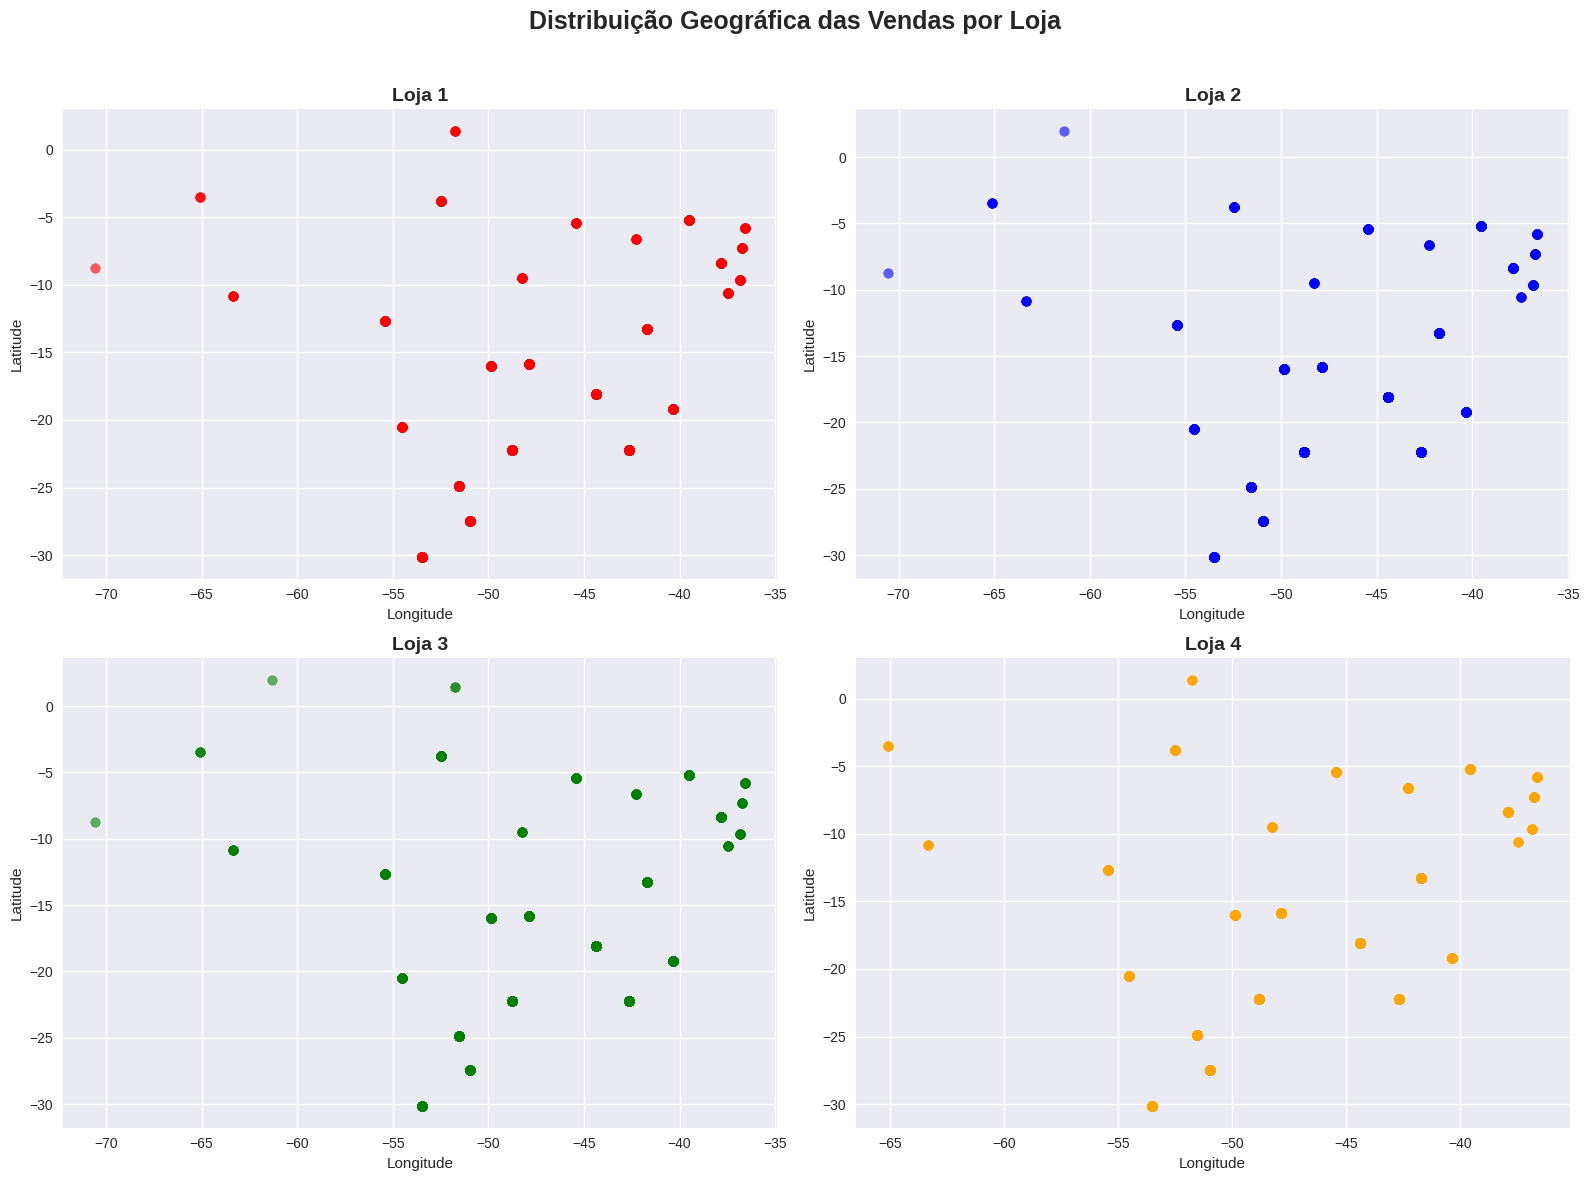

In [52]:
# Gráfico de dispersão de vendas

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

lojas = dados['Loja'].unique()
cores = ['red', 'blue', 'green', 'orange']

for i, (loja_nome, cor) in enumerate(zip(lojas, cores), 1):
    plt.subplot(2, 2, i)

    subset = dados[dados['Loja'] == loja_nome]

    plt.scatter(subset['lon'], subset['lat'], color=cor, alpha=0.6)

    plt.title(f'{loja_nome}', fontsize=14, fontweight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

plt.suptitle('Distribuição Geográfica das Vendas por Loja', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

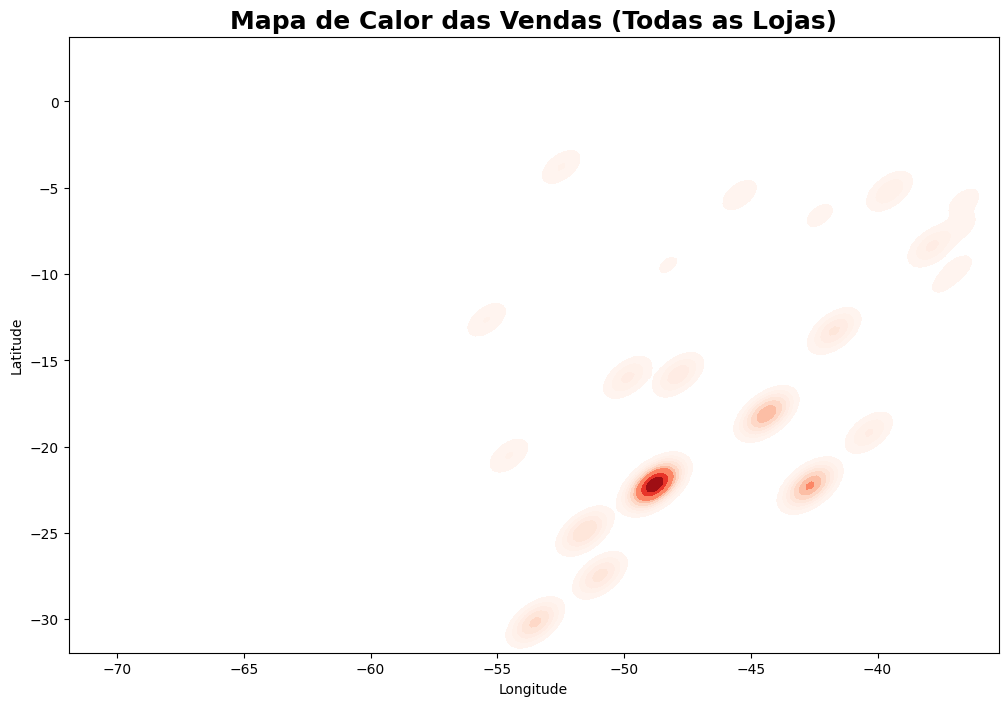

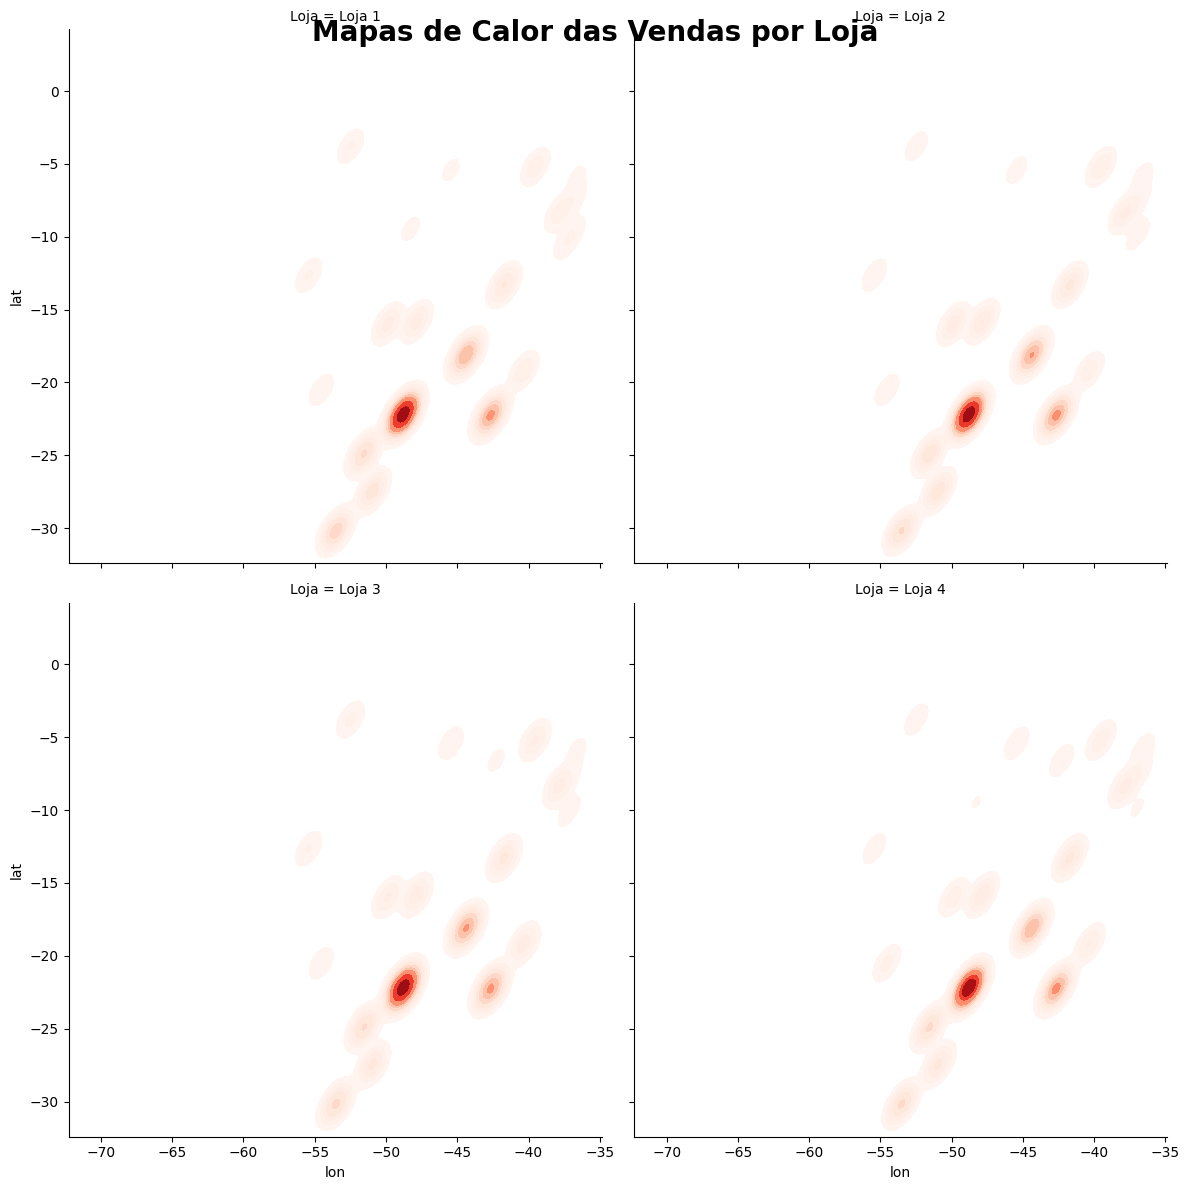

In [41]:
# Mapa de calor geral e por loja

import seaborn as sns

# Heatmap geral
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=dados['lon'],
    y=dados['lat'],
    cmap="Reds",
    fill=True,
    bw_adjust=0.5
)
plt.title('Mapa de Calor das Vendas (Todas as Lojas)', fontsize=18, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Heatmap por loja
g = sns.FacetGrid(dados, col="Loja", col_wrap=2, height=6)
g.map(sns.kdeplot, "lon", "lat", cmap="Reds", fill=True, bw_adjust=0.5)
g.fig.suptitle('Mapas de Calor das Vendas por Loja', fontsize=20, fontweight='bold')
plt.show()


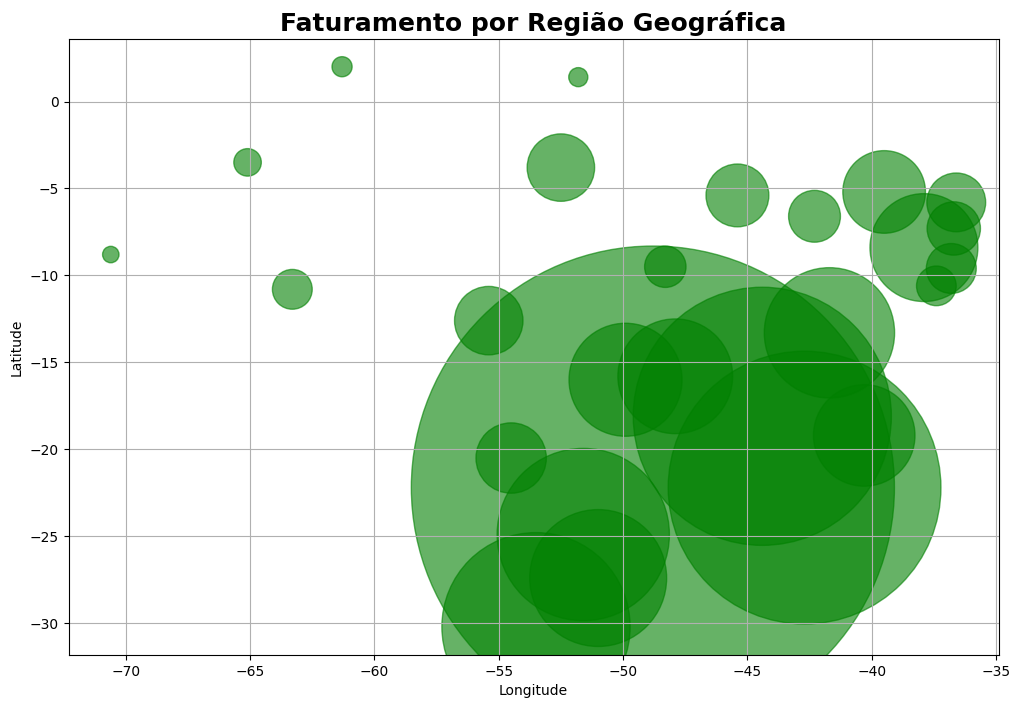

In [42]:
# Faturamento por região

# Arredondar para formar "regiões"
dados['lat_round'] = dados['lat'].round(1)
dados['lon_round'] = dados['lon'].round(1)

# Faturamento por região
faturamento_regiao = dados.groupby(['lat_round', 'lon_round'])['Preço'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.scatter(
    faturamento_regiao['lon_round'],
    faturamento_regiao['lat_round'],
    s=faturamento_regiao['Preço'] * 0.05, # tamanho proporcional ao faturamento
    alpha=0.6,
    color='green'
)

plt.title('Faturamento por Região Geográfica', fontsize=18, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

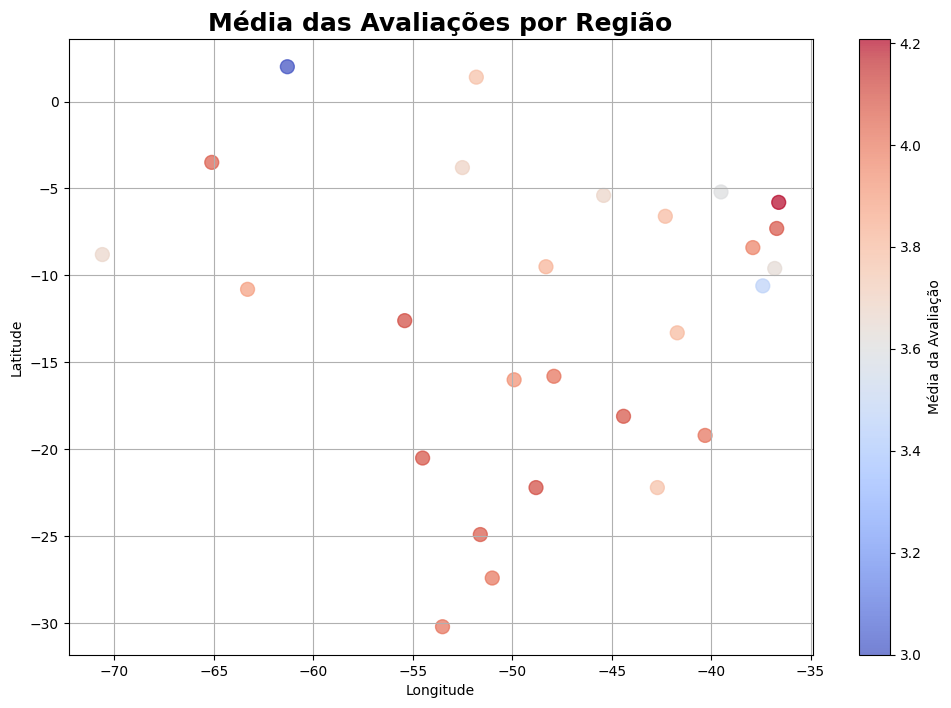

In [43]:
# Avaliações por região

# Arredondar para regiões
dados['lat_round'] = dados['lat'].round(1)
dados['lon_round'] = dados['lon'].round(1)

# Média de avaliação por região
avaliacao_regiao = dados.groupby(['lat_round', 'lon_round'])['Avaliação da compra'].mean().reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    avaliacao_regiao['lon_round'],
    avaliacao_regiao['lat_round'],
    c=avaliacao_regiao['Avaliação da compra'],
    cmap='coolwarm',
    s=100,
    alpha=0.7
)

plt.colorbar(scatter, label='Média da Avaliação')
plt.title('Média das Avaliações por Região', fontsize=18, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [44]:
# Mapa interativo com folium

import folium
from folium.plugins import HeatMap

# Centralizando o mapa
mapa = folium.Map(location=[dados['lat'].mean(), dados['lon'].mean()], zoom_start=6)

# Dados para Heatmap
heat_data = list(zip(dados['lat'], dados['lon']))

# Adicionando Heatmap
HeatMap(heat_data, radius=15).add_to(mapa)

# Exibir mapa
mapa

Considerações sobre a análise geográfica:

A análise das coordenadas geográficas revelou padrões importantes sobre a distribuição das vendas e o desempenho das lojas em diferentes regiões.

Os gráficos de dispersão mostraram que cada loja possui um atendimento de clientes de forma ampla ao redor do território brasileiro, sendo alguns pontos isolados nos quais não há atendimento simultâneo de todas as lojas.

O mapa de calor geral evidencia claramente 1 região principal com alta concentração de vendas e outras 2 regiões com menor intendidade, indicando áreas de maior demanda.

Quando analisamos o faturamento por região, identificamos que algumas zonas contribuem de maneira desproporcional para o faturamento total. Isso abre a possibilidade de estratégias específicas para essas regiões, como campanhas direcionadas ou reforço no estoque local.

A análise das avaliações médias por localização trouxe um insight relevante: regiões mais afastadas ou periféricas tendem a apresentar avaliações ligeiramente mais baixas. Isso pode estar relacionado a desafios logísticos, como tempo de entrega mais longo ou dificuldade na qualidade do serviço. Por outro lado, regiões centrais mantêm uma média de avaliação mais alta.

Quando olhamos o mapa interativo em conjunto com o mapa de calor fica evidênte que as região sudeste é a que prevalece em termos de demandas. Cabe ressaltar também que o mapa interativo desenvolvido com Folium, permite explorar dinamicamente esses dados e pode ser uma ferramenta valiosa para as estratégias futuras da empresa baseada em dados.